# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers in 2020. 


# Summary of Findings



## Introduction
#### Question: 
Are the complaints of women more succesful than men (for the same allegations?)

#### Dataset:
command_at_incident: 1544 null values <br>
complainant_ethnicity: 4464 null values 1041 'Unknown' <br>
complainant_gender: 4195 null values and some 'Not described' <br>
complainant_age_incident: 4812 null values <br>
allegation: 1 null value <br>
precinct: 24 null values <br>
contact_reason: 199 null values and some 'No contact' <br>

33358 rows x 29 columns  <br>

Each row in the dataset is an allegation filed against the police. Each column gives some kind of information about the allegation and if it was successful or not.


## Cleaning and EDA
#### cleaning:
First I replaced all values that are "missing" to np.NaN. Such as "Unknown" in complainant_ethnicity, "Not described" in complainant_gender, and "No contact" in contact_reason. I did this because these values are equal to np.NaN values and contribute to missingness.

Second I removed anyone that was below the age of 0.
There should not exist anyone below the age of 0 in this dataset. 

Third I chose columns that I deemed relevant to our question.

Fourth I located allegations that only came specifically from a "male" or "female".
I decided not to include non-binary genders because they are not part of the population that our question is focused on.

Fifth I created a success column that quantified if an allegation was a success or not based on the board_disposition.
I did this to quantify what success meant for each allegation. 

*note: in the pre cleaning before I started analyzing, I removed non-binary genders because I am only focused on males and females and that it doesn't affect our analysis because they constituted a very small minority of the total population

#### analysis:
From just looking at the complainant_gender column, I can see that an overwhelming majority of complaints are filed by men.

From the success column, I can see that only around 25% of cases are won against the police. Any substantiated value in 'board_disposition' constitutes a win for the complainant.

Men seem to have a higher win rate for cases than women.


## Assessment of Missingness
I believe that the data is NMAR because the site that I got the data from says that every complaint in the database was heavily investigated and thus the authorities should have identifying information on both the complaining party and the officer(s). The complainants have to provide a sworn statement, so it's hard to assume that the authorities don't know the ethnicity of a complainant when knowing their name gives them access to other avenues to identify them through and thus figure out personal information such as gender and ethnicity. A plausible reason as to why it's missing could be that either the officers or the complainant's would rather not disclose that information

I chose to provide a possible explanation for the missingness through the column success. If a case was unsuccessful for the complainant, then the police may choose to withhold putting his or her race down because if he or she is a minority, it could look bad for them if so many cases made by minorities are won in favor of the police.

I chose complainant_gender to be the column where I expected complainant_ethnicity to not be dependent on it because I don't believe gender to be a reason as to why a complainant's ethnicity cannot be identified.

#### sig fig: 
0.05 to insure accuracy 

#### test statistic:
I used tvd (total variation distance) to compare distributions of missingness. I chose tvd because I are dealing with categorical data (complainant_ethnicity).

#### setup:
I did not have a setup for the first and last test, but the second test I isolated race allegations from the dataset. 


#### results:
pval: 0.009<br>
I reject our null hypothesis therefore complaiant_ethnicity's missingness is dependent on success

pval: 0.018<br>
I reject our null hypothesis, so complainant_ethnicity's missingness is also dependent on success when allegations are about race

pval: 0.311<br>
I do not reject the null hypothesis, so complainant_ethnicity's missingness is not dependent on complainant_gender.



## Hypothesis Test
#### null hypothesis: 
In our population, for the same allegations, the successes of men and women have the same distribution.

#### alt hypothesis: 
In our population, for the same allegations, women are more likely to be successful in their cases than men. 

#### sig fig: 
0.01 to insure accuracy 

#### test statistic: 
I used diff of means between the proportions of females that win and the proportions of males that win for each individual allegation. Despite gender being categorical I wanted to compare the proportion of the male population vs the female population.  

#### setup: 
To choose the allegations that I would like to compare the successes between males and females, I eliminated the allegations where charges were made exclusively by either males or females. Then, I selected the top 10 allegations with the most sample size and among them, I chose the ones that had as close to the same proportion of female representation as in the entire population of males and females.  Since alternate hypothesis concerns women, I wanted the proportion of women in each allegation to be as representative of all of the women in the population as possible. I selected "Physical force," "Word," 'Vehicle stop," and "Threat of force (verbal of physical)."


#### results: 
pval:<br>
Physical force:                          0.000<br>
Therefore for 'Physical force' I reject our null hypothesis meaning that for when allegation type is of 'Physical force' women are more likely to be successful in their case than men

Word:                                    0.038<br>
Therefore for word I do not reject our null hypothesis meaning that when allegation type is 'word' women and men are equally likely to be successful in their case.

Vehicle stop:                            0.082<br>
Therefore for 'Vehicle stop' I do not reject our null hypothesis meaning that when allegation type is 'Vehicle stop' women and men are equally likely to be successful in their case.

Threat of force (verbal or physical):    0.792<br>
Therefore for 'Threat of force (verbal or physical)' I do not reject our null hypothesis meaning that when allegation type is 'Threat of force (verbal or physical)' women and men are equally likely to be successful in their case.


#### conclusion:
I conclude that when allegations are about 'physical force' women are more likely to have a successful case than men, but for the other three allegations I found that women and men are equally likely to have a successful case. This could be because women are seen to be "weaker" than men, so then when they allege 'physical force' they are more likely to be believed than men. Otherwise most allegations seem to be very generally categorized into direct physical contact between the officer and complainant, and non-direct physical (coming into contact with a complainant's belongings, etc.) or verbal actions. "Word", "vehicle stop," and "threat of force (verbal of physical)" do not involve the police coming into direct physical contact with the complainant (physical threat of force is probably like posturing or brandishing a baton but not actually assaulting the complainant) and thus it seems that women and men are both equally likely to win a case for those allegations. With those allegations, neither men or women seem more "susceptible."

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

#### Cleaning

In [3]:
nypd = pd.read_csv('allegations_202007271729.csv')
df = nypd.copy()

replaces "unknown" in complainant_ethnicity with NaN and replaces "not described" in complainant_gender with NaN and replaces 'No contact" in contact_reason

In [4]:
df['complainant_ethnicity'] = df ['complainant_ethnicity'].replace('Unknown', np.NaN)
df['complainant_gender'] = df['complainant_gender'].replace('Not described', np.NaN)
df['contact_reason'] = df['contact_reason'].replace('No contact', np.NaN)

if anyone is under the age of 0 then the row is removed

In [5]:
df['complainant_age_incident'] = df['complainant_age_incident'].apply(lambda x: np.NaN if x < 0 else x)

Revelant columns to our question

In [6]:
useful_cols = ['complainant_ethnicity',
            'complainant_gender',
            'complainant_age_incident',
            'allegation',
            'contact_reason',
           'outcome_description',
           'board_disposition',
              ]

Locates allegations that are only by a "Male" or "Female"

In [7]:
only_binary = df[(df['complainant_gender'] == 'Male') | (df['complainant_gender'] == 'Female')]
q_data = only_binary.loc[:, useful_cols]

creates the success column which quantifies if an allegation was a success or not based on if the board_disposition was unsubstantiated/exonerated for unsuccessful and substantiated for successful 

In [8]:
q_data['success'] = only_binary['board_disposition'].apply(lambda x: 0 if x in ['Unsubstantiated', 'Exonerated'] else 1)

Cleaned data set

In [9]:
q_data = q_data.reset_index(drop=True)
q_data.head()

,complainant_ethnicity,complainant_gender,complainant_age_incident,allegation,contact_reason,outcome_description,board_disposition,success
0,Black,Female,38.0,Failure to provide RTKA card,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),1
1,Black,Male,26.0,Action,Moving violation,Moving violation summons issued,Substantiated (Charges),1
2,Black,Male,26.0,Race,Moving violation,Moving violation summons issued,Substantiated (Charges),1
3,Black,Male,45.0,Question,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),1
4,White,Male,31.0,Refusal to process civilian complaint,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),1


#### Univariate analysis

I plotted complainant_gender to calculate the distribution of males and females 

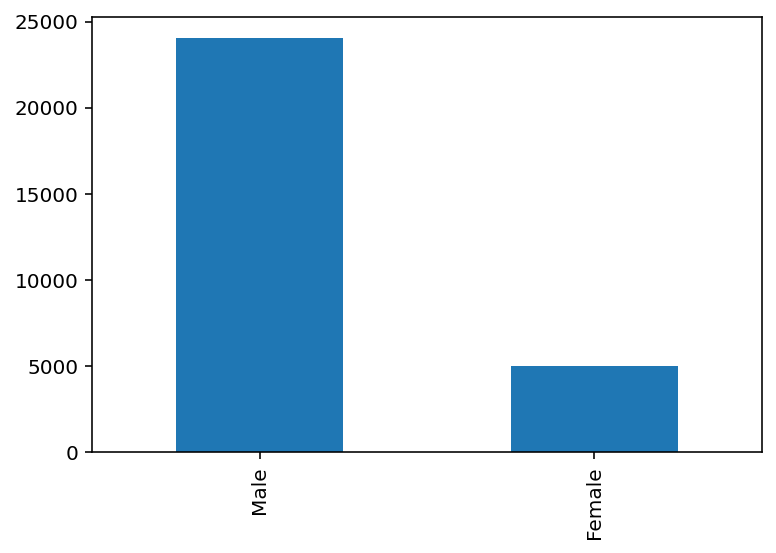

In [10]:
q_data['complainant_gender'].value_counts().plot(kind='bar')

Here I plotted the size of successes compared to failures

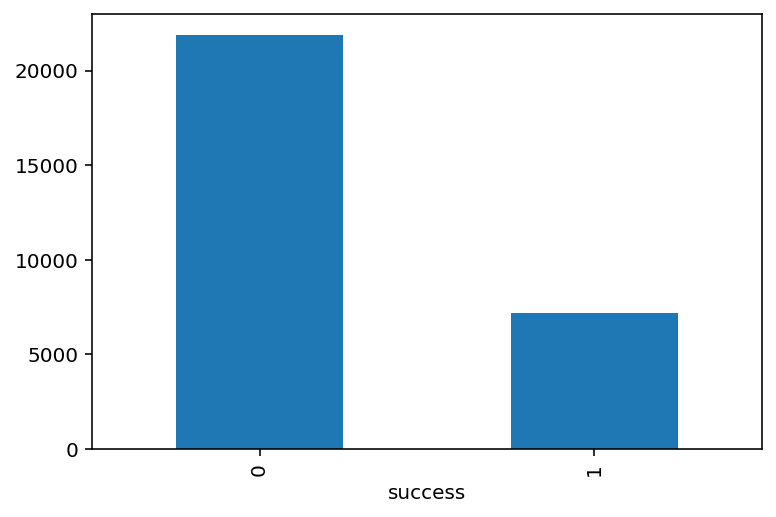

In [11]:
q_data.pivot_table(index='success', aggfunc='size').plot(kind='bar')

#### Bivariate Analysis
Here I plotted successes grouped by gender.

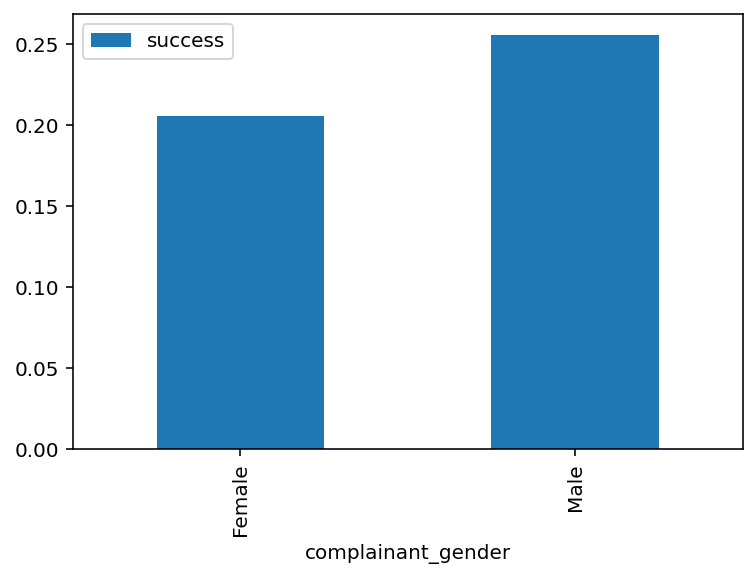

In [12]:
q_data.pivot_table(index='complainant_gender', values=['success'], aggfunc='mean').plot(kind='bar')

#### Interesting Aggregates

All allegation types that have both "male" and "female" complainants

In [13]:
q_data = q_data.assign(gender = q_data['complainant_gender'].replace({'Male':1,'Female':2}))
out = q_data.groupby(['allegation'])['gender'].mean() 
out2 = (out == 2) | (out==1)
alle = out2[out2].index
new_data = q_data[~q_data['allegation'].isin(alle)]
new_data.allegation.unique()

array(['Failure to provide RTKA card', 'Action', 'Race', 'Question',
       'Refusal to process civilian complaint', 'Sexual orientation',
       'Word', 'Refusal to provide shield number', 'Retaliatory summons',
       'Refusal to provide name/shield number', 'Search (of person)',
       'Pepper spray', 'Physical force', 'Handcuffs too tight', 'Frisk',
       'Vehicle stop', 'Vehicle search', 'Strip-searched',
       'Threat of arrest', 'Threat of force (verbal or physical)', 'Stop',
       'Refusal to obtain medical treatment',
       'Hit against inanimate object', 'Frisk and/or search', 'Other',
       'Question and/or stop', 'Nonlethal restraining device',
       'Retaliatory arrest', 'Seizure of property', 'Chokehold', 'Gender',
       'Nightstick as club (incl asp & baton)', 'Refusal to provide name',
       'Gun Pointed', 'Other blunt instrument as a club',
       'Property damaged', 'Interference with recording',
       'Refusal to show search warrant',
       'Threat to damag

Here are the success rates of allegations grouped by allegation type and gender

In [14]:
data = new_data.groupby(['allegation','complainant_gender']).aggregate({'success':np.mean}).reset_index()
data.head()

,allegation,complainant_gender,success
0,Action,Female,0.261538
1,Action,Male,0.323651
2,Chokehold,Female,0.166667
3,Chokehold,Male,0.181818
4,Demeanor/tone,Female,0.150000


There are 16 allegation types grouped by gender that have a 0% success rate

In [15]:
c = data.sort_values(by=['success'])
c.head(16)

,allegation,complainant_gender,success
82,Refusal to show arrest warrant,Female,0.0
32,Gun as club,Female,0.0
34,Gun fired,Female,0.0
36,Handcuffs too tight,Female,0.0
108,Sexual orientation,Female,0.0
16,Flashlight as club,Female,0.0
103,"Sex Miscon (Sexual Harassment, Gesture)",Male,0.0
26,Gender Identity,Female,0.0
102,"Sex Miscon (Sexual Harassment, Gesture)",Female,0.0
54,Physical disability,Female,0.0


There are 5 allegation types grouped by gender that have a 100% success rate

In [16]:
d = data.sort_values(by=['success'],ascending=False)
d.head(5)

,allegation,complainant_gender,success
48,Other blunt instrument as a club,Female,1.0
27,Gender Identity,Male,1.0
98,Search of recording device,Female,1.0
13,Failed to Obtain Language Interpretation,Male,1.0
12,Failed to Obtain Language Interpretation,Female,1.0


### Assessment of Missingness

#### Here I check if complaiant_ethnicity's missingness is dependent on success

First I calculate the empirical distribution of success by null and not-null

In [17]:
distr = (
    q_data
    .assign(is_null=q_data.complainant_ethnicity.isnull())
    .pivot_table(index='is_null', columns='success', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

success,0,1
is_null,,
False,0.754301,0.245699
True,0.724671,0.275329


Then I shuffle success and calculate its tvd for 1000 repetitions

In [18]:
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    

    shuffled_col = (
        q_data['success']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    

    shuffled = (
        q_data
        .assign(**{
            'success': shuffled_col,
            'is_null': q_data['complainant_ethnicity'].isnull()
        })
    )
    

    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='success', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2

    
    tvds.append(tvd)

I calculate our observed value

In [19]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.029629419946916147

Finally I calculate our pvalue

In [20]:
pval = np.mean(tvds > obs)
pval

0.011

I reject our null hypothesis therefore complaiant_ethnicity's missingness is dependent on success

#### Here I check if complaiant_ethnicity's missingness is dependent on allegations about race

Here I create a dataframe that only has allegations about race

In [21]:
race = q_data[q_data['allegation'] == 'Race'].reset_index(drop=True)
race.head()

,complainant_ethnicity,complainant_gender,complainant_age_incident,allegation,contact_reason,outcome_description,board_disposition,success,gender
0,Black,Male,26.0,Race,Moving violation,Moving violation summons issued,Substantiated (Charges),1,1
1,Black,Female,42.0,Race,Regulatory inspection,Arrest - other violation/crime,Unsubstantiated,0,2
2,Black,Male,27.0,Race,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Unsubstantiated,0,1
3,Black,Male,28.0,Race,Execution of search warrant,Arrest - other violation/crime,Unsubstantiated,0,1
4,Black,Female,25.0,Race,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Unsubstantiated,0,2


Here I calculate the empirical distribution of success by null and not-null

In [22]:
distr = (
    race
    .assign(is_null=race.complainant_ethnicity.isnull())
    .pivot_table(index='is_null', columns='success', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

success,0,1
is_null,,
False,0.905085,0.094915
True,0.714286,0.285714


Then I shuffle success and calculate its tvd for 1000 repetitions

In [23]:
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    

    shuffled_col = (
        race['success']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    

    shuffled = (
        race
        .assign(**{
            'success': shuffled_col,
            'is_null': race['complainant_ethnicity'].isnull()
        })
    )
    

    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='success', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2

    
    tvds.append(tvd)

I calculate the observed value

In [24]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.1907990314769976

Finally I calculate the pvalue

In [25]:
pval = np.mean(tvds > obs)
pval

0.024

I reject our null hypothesis, so complainant_ethnicity's missingness is also dependent on success when allegations are about race

#### Here I check if complainant_ethnicity's missingness is dependent on complainant_gender

First I calculate the empirical distribution of complainant_gender by null and not-null

In [26]:
distr = (
    q_data
    .assign(is_null=q_data.complainant_ethnicity.isnull())
    .pivot_table(index='is_null', columns='complainant_gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

complainant_gender,Female,Male
is_null,,
False,0.172209,0.827791
True,0.182521,0.817479


Then I shuffle complainant_gender and calculate its tvd for 1000 repetitions

In [27]:
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    
   
    shuffled_col = (
        q_data['complainant_gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    

    shuffled = (
        q_data
        .assign(**{
            'complainant_gender': shuffled_col,
            'is_null': q_data['complainant_ethnicity'].isnull()
        })
    )
    

    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='complainant_gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2

    
    tvds.append(tvd)

Here I calculate the observed value

In [28]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.010312242239870067

Finally I calculate the pvalue

In [29]:
pval = np.mean(tvds > obs)
pval

0.326

I do not reject the null hypothesis, so complainant_ethnicity's missingness is not dependent on complainant_gender.

### Hypothesis Test

#### null hypothesis: 
In our population, for the same allegations, the successes of men and women have the same distribution.

#### alt hypothesis: 
In our population, for the same allegations, women are more likely to be successful in their cases than men. 

#### sig fig:
0.01

To choose the allegations that I would like to compare the successes between males and females, I eliminated the allegations where charges were made exclusively by either males or females. Then, I selected the top 10 allegations with the most sample size and among them, I chose the ones that had as close to the same proportion of female representation as in the entire population of males and females.  Since alternate hypothesis concerns women, I wanted the proportion of women in each allegation to be as representative of all of the women in the population as possible. I selected "Physical force," "Word," 'Vehicle stop," and "Threat of force (verbal of physical)."

In [30]:
# proportion of females in the data set
fem_only= q_data.groupby('complainant_gender').size()
prop_fem = fem_only[0] / fem_only.sum()

# proportion of women who filed against the police for physical force
pf = q_data[q_data['allegation'] == 'Physical force'].groupby('complainant_gender').size()
prop_pf = pf[0] / pf.sum()

# proportion of women who filed against the police for word
w = q_data[q_data['allegation'] == 'Word'].groupby('complainant_gender').size()
prop_w = w[0] / w.sum()

# proportion of women who filed against the police for vehicle stop
vst = q_data[q_data['allegation'] == 'Vehicle stop'].groupby('complainant_gender').size()
prop_vst = vst[0] / vst.sum()

# proportion of women who filed against the police for threat of force
tof = q_data[q_data['allegation'] == 'Threat of force (verbal or physical)'].groupby('complainant_gender').size()
prop_tof = tof[0] / tof.sum()

alleg = ['Physical force', 'Word', 'Vehicle stop', 'Threat of force (verbal or physical)']

{'Whole population': prop_fem, 'Physical force': prop_pf, 'Word': prop_w, \
    'Vehicle stop': prop_vst, 'Threat of force (verbal or physical)': prop_tof}

{'Whole population': 0.1726675607826954,
 'Physical force': 0.1672940192388122,
 'Word': 0.2368558042686101,
 'Vehicle stop': 0.10487580496780129,
 'Threat of force (verbal or physical)': 0.12288613303269448}

In our hypothesis test, we're doing a test for each allegation individually. I run 1000 simulations for each allegation and I shuffle the success column in each simulation. I find the difference of means between both genders after shuffling and add it to the nested list of results.

In [31]:
nrepetitions = 1000

alleg = ['Physical force', 'Word', 'Vehicle stop', 'Threat of force (verbal or physical)']

differences = []
for i in alleg:
    lst = []
    for j in range(n_repetitions):
        filt = q_data[q_data['allegation'] == i].reset_index(drop=True)

        shuffled_successes = (
            filt['success']
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )


        shuffled = (
            filt
            .assign(**{'shuffled success': shuffled_successes})
        )


        group_means = (
            shuffled
            .groupby('complainant_gender')
            .mean()
            .loc[:, 'shuffled success']
        )
        difference = group_means.diff().iloc[-1]

    
        lst.append(abs(difference))
    differences.append(lst)

Here I get the observed values for each allegation type

In [32]:
alleg = ['Physical force', 'Word', 'Vehicle stop', 'Threat of force (verbal or physical)']
obs_diff = []
for i in alleg:
    filt = q_data[q_data['allegation'] == i].reset_index(drop=True)
    observed_difference = (
        filt
        .groupby('complainant_gender')['success']
        .mean()
        .diff()
        .iloc[-1]
    )
    obs_diff.append(observed_difference)
obs_diff

[0.03624497739829231,
 0.03093713925910377,
 0.06068228124267505,
 0.009669583264545645]

Finally I calculate the pvalue for each allegation type

In [33]:
pval = []
for i in range(4):
    pval.append(np.mean(differences[i] > obs_diff[i]))
pd.Series(pval,index=alleg)

Physical force                          0.000
Word                                    0.038
Vehicle stop                            0.082
Threat of force (verbal or physical)    0.792
dtype: float64

For 'Physical force' I reject our null hypothesis

For 'word' I do not reject our null hypothesis

For 'Vehicle stop' I do not reject our null hypothesis

For 'Threat of force (verbal or physical)' I do not reject our null hypothesis 